# **<font style="color:rgb(0, 133, 202)">Gesture Recognition Demo</font>**

## **<font style="color:rgb(0, 133, 202)">Demo Description: Gesture Recognition with Two Trained Models</font>**

This demo presents a gesture recognition system designed to **classify video gestures** into specific commands using two deep learning models:
1.	**Scratch-trained LRCN model** (custom architecture trained without pre-trained weights).
2.	**Transfer learning LRCN model** (using MobileNetV2 as a feature extractor).

## **<font style="color:rgb(0, 133, 202)">Purpose</font>**

The system detects gestures performed via a webcam and classifies them into one of five categories corresponding to media playback controls:
-	**Thumbs up**: Increase the volume.
-	**Thumbs down**: Decrease the volume.
-	**Left swipe**: ‘Jump’ backward 10 seconds.
-	**Right swipe**: ‘Jump’ forward 10 seconds.
-	**Stop**: Pause the movie.

This **classification** can be applied **in real-time** to create a gesture-controlled user interface.

All the functions that allows to perform the gesture recognition in this demo, are defined within the `functions_for_demo.py` file.


## **<font style="color:rgb(0, 133, 202)">How to use</font>**

Run each single code chunk, following the instructions.

In [1]:
# Press play to import functions
from functions_for_demo import *

## **<font style="color:rgb(0, 133, 202)">How to make gestures</font>**

Press play to play some video gesture examples and consider them as references for recording your video.

**<font style="color:rgb(0, 133, 202)">Thumbs Up</font>**

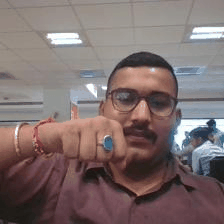

In [2]:
# Press play
gif_path = 'gif/Thumbs_Up_animation.gif'
display(Image(filename=gif_path))

**<font style="color:rgb(0, 133, 202)">Thumbs Down</font>**

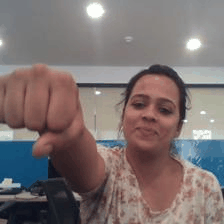

In [3]:
# Press play
gif_path = 'gif/Thumbs_Down_animation.gif'
display(Image(filename=gif_path))

**<font style="color:rgb(0, 133, 202)">Stop</font>**

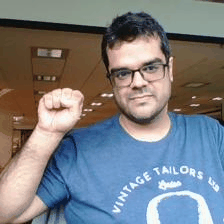

In [4]:
# Press play
gif_path = 'gif/Stop_animation.gif'
display(Image(filename=gif_path))

**<font style="color:rgb(0, 133, 202)">Swipe Right</font>**

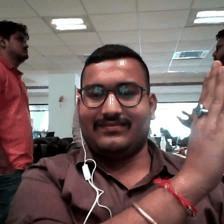

In [5]:
# Press play
gif_path = 'gif/Right_Swipe_animation.gif'
display(Image(filename=gif_path))

**<font style="color:rgb(0, 133, 202)">Swipe Left</font>**

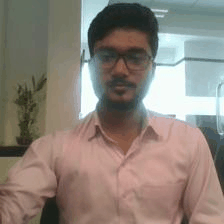

In [6]:
# Press play
gif_path = 'gif/Left_Swipe_animation.gif'
display(Image(filename=gif_path))

**<font style="color:rgb(0, 133, 202)">Some recommendations</font>**

The classifier is **highly sensitive** to the subject’s position and the way the gesture is performed. For accurate classification, the following guidelines are recommended:
-	For **thumbs up**, ensure the hand is clearly framed in the foreground, at face level, without including the arm. This helps achieve more accurate classification.
-	For **swipes**, move the hand along the edge of the PC from right to left, or left to right depending on the gesture. It’s crucial that the forearm is also captured in the movement, not just the hand.
-	In the specific case of a **left swipe**, it has been observed that the classifier struggles to recognize the movement if long sleeves are worn. It’s recommended to leave the arm uncovered for better results, and show clearly the hand and the forearm.
-	**Right swipe** and **thumbs down** gestures tend to be recognized more easily.
-	For **stop**, it’s essential that the hand is at face level, well in the foreground and kept still.
-   Perform gestures with **right-hand**.

These recommendations are necessary due to the limited size of the dataset used. A larger dataset, where the movement can be performed with more variability and less precision, would likely lead to improved performance and better adaptability.

**Note**: The images are *mirrored*, so swipe gestures will appear inverted in the video (e.g., a right swipe will show the right hand moving from right to left, even though, in reality, the person is performing the motion from left to right). Remember that gestures are often performed with right-hand.

## **<font style="color:rgb(0, 133, 202)">Video Recording</font>**

**<font style="color:rgb(0, 133, 202)">Press play</font>** to record the video. The result is displayed below in a window of 30 frames.

**<font style="color:rgb(0, 133, 202)">Pay attention:</font>** you may encounter problems in recording the video, particularly if you run this demo on a device connected to others (as Apple environment). If so, switch the `camera_index` to 1 in the `record_video` function, instead of using the 0 default value.

**<font style="color:rgb(0, 133, 202)">Horrible Video Capture?</font>** Don't worry! Press play again and record another video.

Recording video...
Video recording completed.
Displaying recorded video frames.


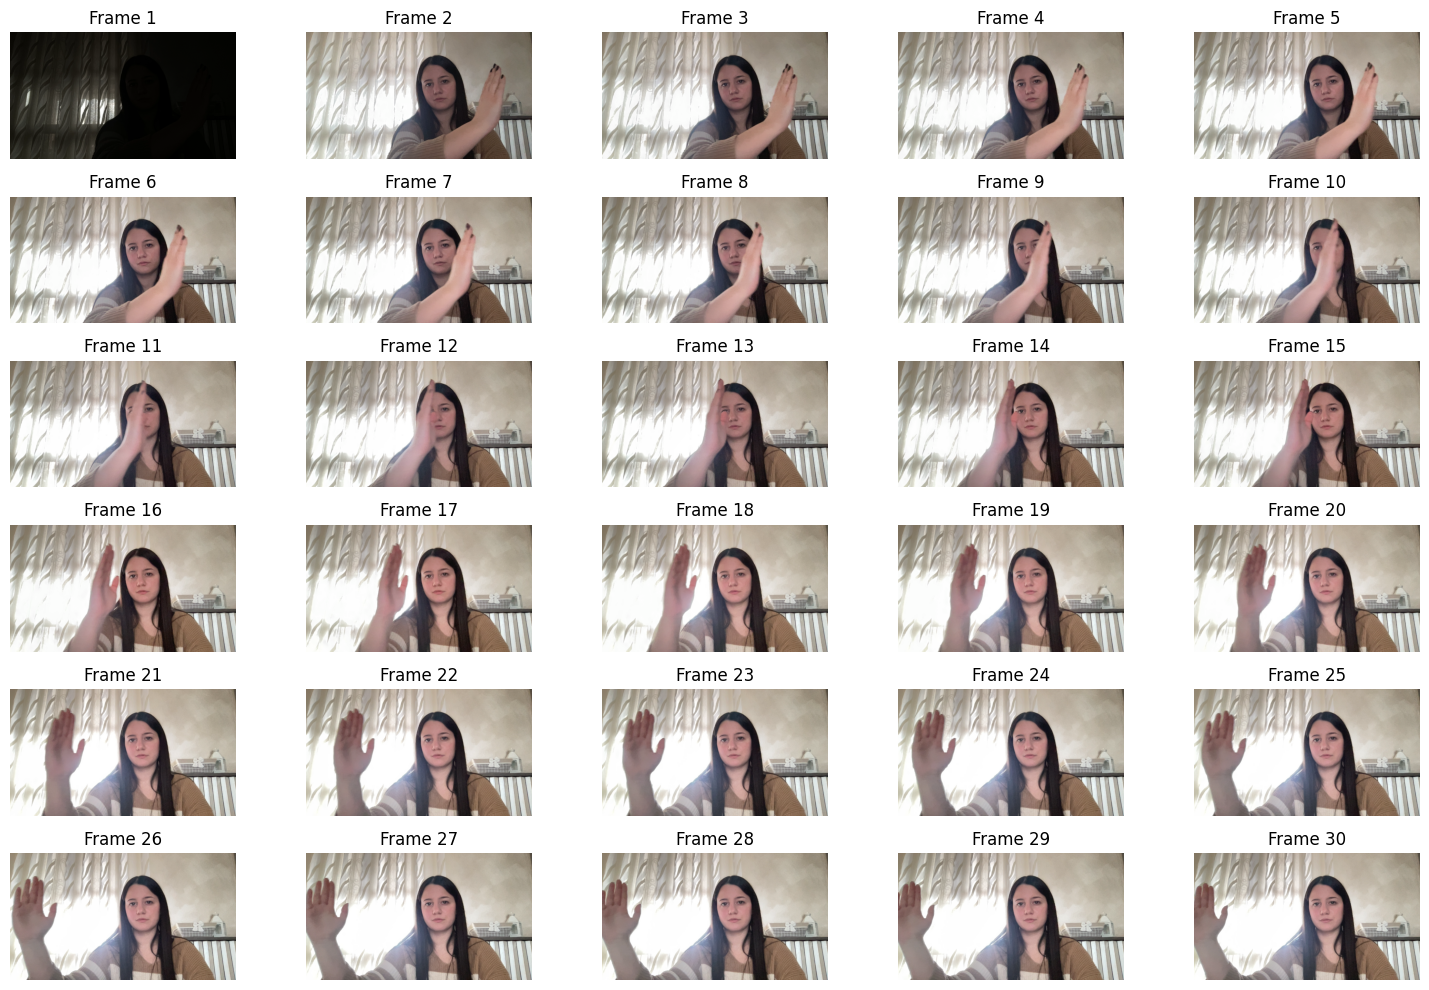

In [265]:
# Press play to record the video and check the result
frames = record_video(camera_index=1)

if len(frames) > 0:
    print("Displaying recorded video frames.")
    display_frames_in_grid(frames)
else:
    print("No frames recorded.")
    print("Please drag and drop a video file into your working directory and provide the path below.")
    video_path = input("Enter the path of the video file: ").strip()
    
    if video_path:
        frames = load_video_frames_manual(video_path, total_frames=30)
        if len(frames) > 0:
            display_frames_in_grid(frames)
        else:
            print("Error: Unable to extract frames from the uploaded video.")
    else:
        print("No video file provided.")

## **<font style="color:rgb(0, 133, 202)">Frames Pre-Processing</font>**

**<font style="color:rgb(0, 133, 202)">How does it work?</font>** 

Each frame is resized to 64x64 and normalized for compatibility with the models. Below, you can see how each frame is processed to be correctly passed through classifiers.

New Video-Frame dimensions: (30, 64, 64, 3)
Compare the original frame with the pre-processed one:


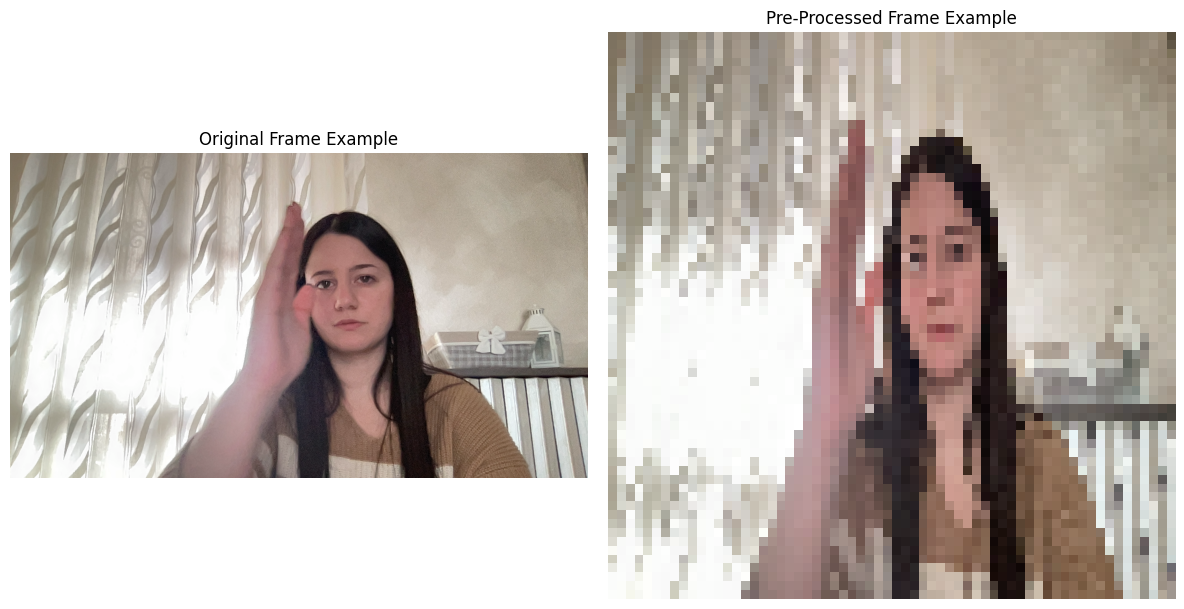

In [266]:
# Press play to pre-process the video and show differences
frames_array = convert_frames_to_array(frames)
print(f"New Video-Frame dimensions: {frames_array.shape}")

print(f"Compare the original frame with the pre-processed one:")
compare_frames(frames, frames_array)

## **<font style="color:rgb(0, 133, 202)">Gesture Recognition</font>**

**<font style="color:rgb(0, 133, 202)">How do they work?</font>** 

The preprocessed video is passed through both models for classification. The models output:
-	Predicted gesture.
-	Probabilities for all gesture categories.

**<font style="color:rgb(0, 133, 202)">How are the results shown?</font>** 

The system displays **two bar charts**, one for each model, showing the predicted probabilities for each class. The predicted gesture, corresponding to the class with the highest probability, is printed out with its likelihood for both models.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


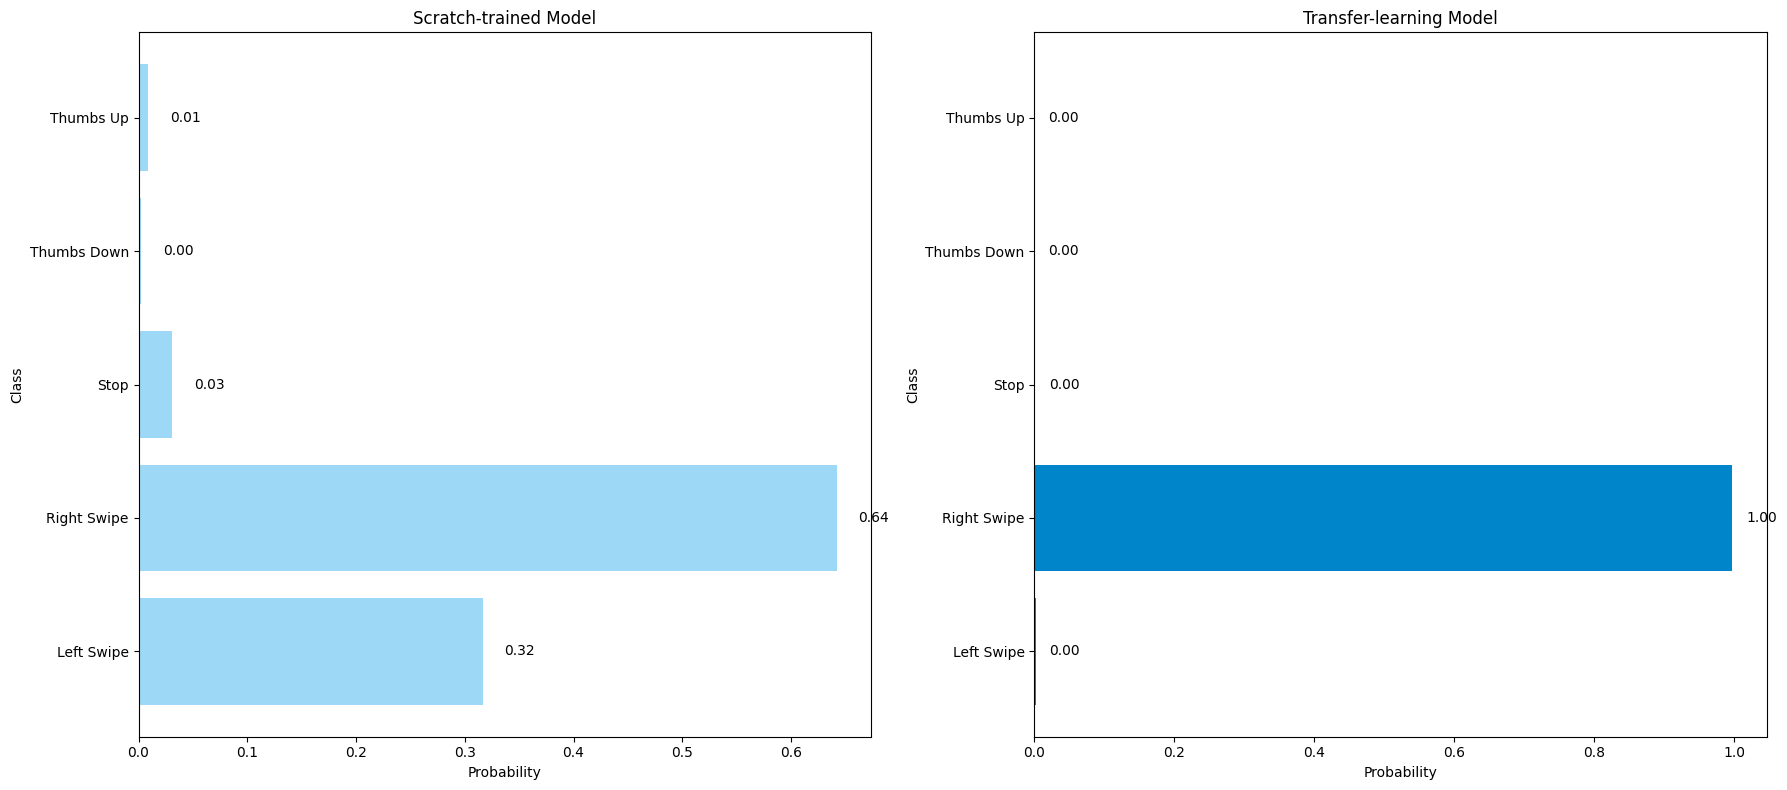

Scratch-trained Model: Predicted Class: Right Swipe, Probability: 0.6418
Transfer-learning Model: Predicted Class: Right Swipe, Probability: 0.9976


In [267]:
# Press play to classify your gesture
compare_classifications(frames_array, load_net_scratch, load_net_transfer)